# In this notebook:

1. Importing libraries and data

2. Data cleaning

   2.1 Checking for missing values

   2.2 Checking for duplicates

   2.3 Checking for invalid transactions


3. Exploratory analysis and further cleaning

   3.1 Identifying outliers

   3.2 Identifying non-product descriptions

   3.3 Exploring Geographical Distribution

   3.4 Exploring product variety and number of customers

   3.5 Exploring UnitPrice and Quantity in the Cleaned Dataset



5. Exporting the data frame

# 1. Importing libraries and data

In [4]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [6]:
path = r'/Users/buketoztekin/Documents/Tata Internship/'
df = pd.read_excel(os.path.join(path, 'Online Retail Data Set.xlsx'))

In [10]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df.shape

(541909, 8)

# Data Cleaning

## 2.1. Checking for missing values

In [16]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
# Replacing missing values with NaN for accurate missing data handling in the Description and CustomerID columns
df['CustomerID'] = df['CustomerID'].replace('NULL', np.nan)  # Convert NULL to NaN
df['Description'] = df['Description'].replace('NULL', np.nan)  # Convert NULL to NaN

In [20]:
# Count the number of NaN values in CustomerID and Description columns
nan_counts = df[["CustomerID", "Description"]].isna().sum()

# Display results
print(nan_counts)

CustomerID     135080
Description      1454
dtype: int64


## 2.2. Checking for duplicates

In [23]:
df.duplicated().sum()

5268

In [27]:
#Dropping the duplicates and checking the shape of the new data frame after duplicates are dropped
df = df.drop_duplicates()
df.shape

(536641, 8)

## 2.3. Checking for invalid transactions

In [30]:
#Checking for invalid transactions with 'Quantity' less than 1.
df[df['Quantity'] < 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [34]:
#Checking for invalid transactions with 'UnitPrice' less than or equal to 0.
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [42]:
# Removing invalid transactions from the dataframe
df = df[(df['Quantity'] >= 1) & (df['UnitPrice'] > 0)]
print(df[(df['Quantity'] < 1) | (df['UnitPrice'] < 0)])  # Should return an empty DataFrame
df.shape

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


(524878, 8)

In [40]:
#In total, 11763 rows with invalid transactions were dropped.

# 3. Exploratory analysis and further cleaning

## 3.1 Identifying outliers

In [48]:
#Descriptive statistics for numerical variables
df[['UnitPrice', 'Quantity']].describe()

,UnitPrice,Quantity
count,524878.000000,524878.000000
mean,3.922573,10.616600
std,36.093028,156.280031
min,0.001000,1.000000
25%,1.250000,1.000000
50%,2.080000,4.000000
75%,4.130000,11.000000
max,13541.330000,80995.000000


<Axes: xlabel='UnitPrice'>

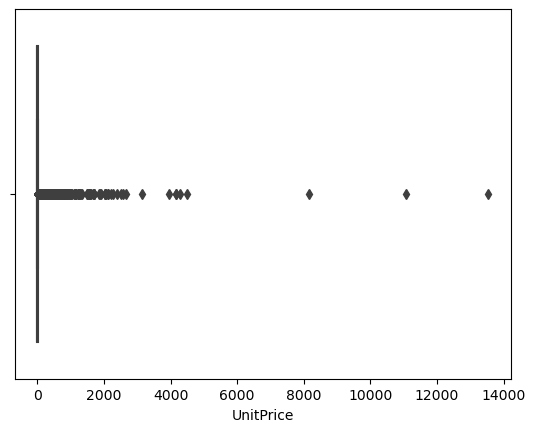

In [50]:
#Checking for possible outliers in 'UnitPrice'
sns.boxplot(x=df['UnitPrice'])

<Axes: xlabel='Quantity'>

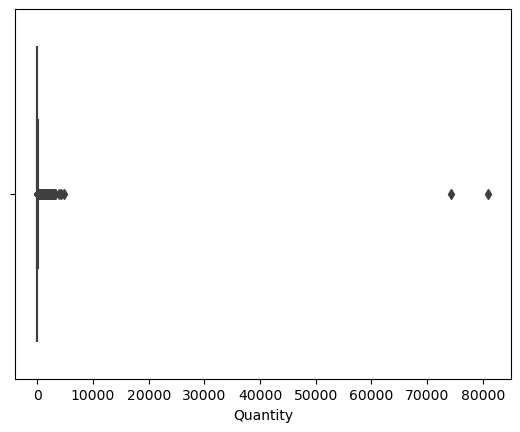

In [52]:
#Checking for possible outliers in 'Quantity'
sns.boxplot(x=df['Quantity'])

### 🔹 Identifying Outliers in Quantity & Unit Price

The boxplots reveal that there are **significant outliers** in both the **Quantity** and **UnitPrice** distributions. These extreme values can distort our analysis by affecting summary statistics like the **mean** and visualizations.

### Handling the outliers: Using the 99th percentile method
Since our dataset is large and heavily skewed, using the **99th percentile** helps **retain 99% of valid transactions while removing the most extreme outliers**. This ensures that:
- We **preserve meaningful data** without losing too many valid entries.
- We **eliminate highly unrealistic prices or order quantities**, which may be **data entry errors** or **unusual transactions**.
- Our insights are more **representative of normal business patterns** instead of being skewed by extreme values.

By applying the **99th percentile threshold**, we effectively remove the highest **1% of extreme Unit Prices and Quantities**, ensuring a more **accurate and reliable analysis**.

In [55]:
#Checking 99th percentile treshold for UnitPrice
price_threshold = df["UnitPrice"].quantile(0.99)
print("99th percentile for Unit Price:", price_threshold)

99th percentile for Unit Price: 16.98


#### The 99th percentile threshold for Unit Price is $16.98, meaning that 99% of products are priced below this value, and any higher prices are considered outliers that may distort the analysis.

In [58]:
# Define the threshold based on the 99th percentile
quantity_threshold = df["UnitPrice"].quantile(0.99)

# Filter out extreme outliers
df_filtered = df[df["UnitPrice"] <= quantity_threshold]

# Check the new distribution
df_filtered["UnitPrice"].describe()

count    519804.000000
mean          3.104688
std           2.947749
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max          16.980000
Name: UnitPrice, dtype: float64

<Axes: xlabel='UnitPrice'>

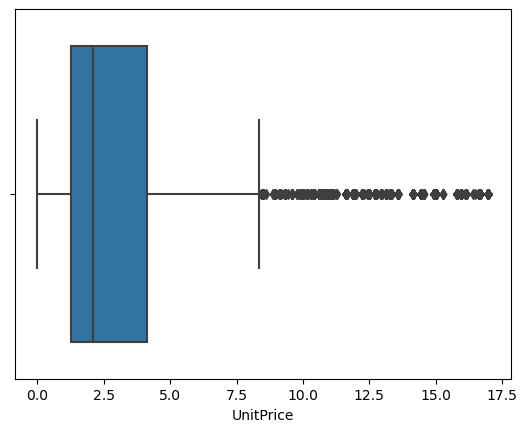

In [60]:
#Box plot for 'UnitPrice' after dropping the outliers
sns.boxplot(x=df_filtered['UnitPrice'])

#### The new boxplot shows a much more balanced distribution of unit prices.

In [65]:
#Checking 99th percentile treshold for Quantity
quantity_threshold = df_filtered["Quantity"].quantile(0.99)
print("99th percentile for Quantity:", quantity_threshold)

99th percentile for Quantity: 100.0


#### The 99th percentile threshold for Quantity is 100, indicating that 99% of orders have a quantity of 100 or fewer, while higher values are considered outliers that may skew the analysis.

In [68]:
# Filter out extreme outliers
df_filtered2 = df_filtered[df_filtered["Quantity"] <= quantity_threshold]

# Check the new distribution
df_filtered2["Quantity"].describe()

count    514959.000000
mean          8.050453
std          12.642503
min           1.000000
25%           1.000000
50%           4.000000
75%          10.000000
max         100.000000
Name: Quantity, dtype: float64

<Axes: xlabel='Quantity'>

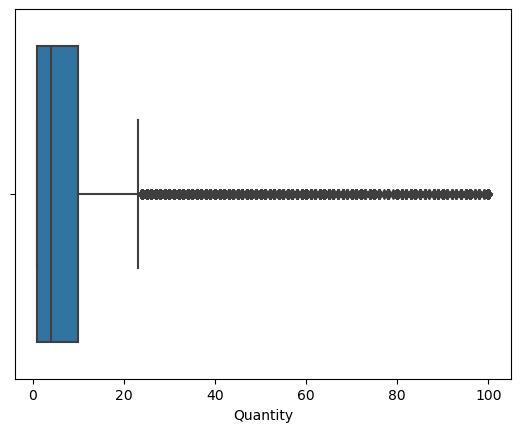

In [70]:
#Box plot for 'Quantity' after dropping the outliers
sns.boxplot(x=df_filtered2['Quantity'])

### After removing the outliers, both Unit Price and Quantity now exhibit a more balanced distribution, with fewer extreme values, making the data more representative of typical transactions and reducing skewness in the analysis.

## 3.2. Identifying non-product descriptions

In [78]:
# Checking product descriptions to detect potential non-product transactions that could affect the analysis
df_filtered2["Description"].value_counts().head(50)

Description
WHITE HANGING HEART T-LIGHT HOLDER     2274
JUMBO BAG RED RETROSPOT                2049
REGENCY CAKESTAND 3 TIER               1748
PARTY BUNTING                          1684
LUNCH BAG RED RETROSPOT                1577
ASSORTED COLOUR BIRD ORNAMENT          1419
SET OF 3 CAKE TINS PANTRY DESIGN       1387
LUNCH BAG  BLACK SKULL.                1299
PACK OF 72 RETROSPOT CAKE CASES        1276
NATURAL SLATE HEART CHALKBOARD         1253
JUMBO BAG PINK POLKADOT                1208
HEART OF WICKER SMALL                  1201
JUMBO STORAGE BAG SUKI                 1191
JUMBO SHOPPER VINTAGE RED PAISLEY      1177
PAPER CHAIN KIT 50'S CHRISTMAS         1162
LUNCH BAG SPACEBOY DESIGN              1159
LUNCH BAG CARS BLUE                    1158
JAM MAKING SET PRINTED                 1154
SPOTTY BUNTING                         1147
JAM MAKING SET WITH JARS               1129
RECIPE BOX PANTRY YELLOW DESIGN        1110
WOODEN PICTURE FRAME WHITE FINISH      1100
LUNCH BAG SUKI DESIG

In [80]:
# Checking product descriptions to detect potential non-product transactions that could affect the analysis
df_filtered2["Description"].value_counts().tail(50)

Description
HOT WATER BOTTLE BABUSHKA LARGE        1
SET/6 IVORY BIRD T-LIGHT CANDLES       1
M/COLOUR POM-POM CURTAIN               1
BLACK CHERRY LIGHTS                    1
CURIOUS IMAGES SCRAP BOOK SET          1
MINT DINER CLOCK                       1
CAKE STAND LACE WHITE                  1
CARRIAGE                               1
BLUE GINGHAM ROSE CUSHION COVER        1
BLUE CRYSTAL BOOT PHONE CHARM          1
PINK ALLIUM  ARTIFICIAL FLOWER         1
 TOADSTOOL BEDSIDE LIGHT               1
FIRE POLISHED GLASS NECKL GOLD         1
BLUE/NAT SHELL NECKLACE W PENDANT      1
ACRYLIC JEWEL SNOWFLAKE,PINK           1
WHITE DOVE HONEYCOMB PAPER GARLAND     1
FILIGREE DIAMANTE CHAIN                1
GARDENERS KNEELING PAD                 1
ORANGE/FUSCHIA STONES NECKLACE         1
COUNTRY COTTAGE  DOORSTOP GREEN        1
WATERING CAN SINGLE HOOK PISTACHIO     1
KEEP OUT GIRLS DOOR HANGER             1
BLACK GLASS/SHELL/PEARL NECKLACE       1
HAPPY BIRTHDAY CARD TEDDY/CAKE         1
BARO

In [84]:
# Identifying and removing non-product descriptions such as fees, postage, and adjustments that do not represent actual inventory sales

import re

# Define non-product keywords
non_product_keywords = ["POSTAGE", "FEE", "ADJUST", "MANUAL", "DOTCOM", "CARRIAGE", "REFUND", "DEBT"]

# Create a regex pattern that ensures full-word matches only
pattern = r'\b(?:' + '|'.join(non_product_keywords) + r')\b'

# Filter descriptions that exactly match these words
non_product_rows = df_filtered2[df_filtered2["Description"].str.contains(pattern, case=False, na=False, regex=True)]

# Display results
non_product_rows[["Description", "UnitPrice", "Quantity"]]

,Description,UnitPrice,Quantity
386,POSTAGE,15.00,1
2239,Manual,1.25,1
5684,Manual,2.55,1
6798,Manual,0.85,2
7976,Manual,0.42,12
...,...,...,...
536863,Next Day Carriage,15.00,1
537782,Next Day Carriage,15.00,1
538321,Manual,0.42,3
540841,BLACK BAROQUE CARRIAGE CLOCK,8.29,3


In [86]:
# Count how many rows in df_filtered2 contain non-product keywords
count_non_products_before = df_filtered2[df_filtered2["Description"].str.contains(pattern, case=False, na=False, regex=True)].shape[0]

print("Non-product rows inside df_filtered2:", count_non_products_before)

Non-product rows inside df_filtered2: 583


#### A total of 583 rows were identified as non-product transactions
#### These rows are removed to ensure that the analysis focuses only on actual product sales

In [89]:
df_cleaned_products = df_filtered2[~df_filtered2["Description"].str.contains(pattern, case=False, na=False, regex=True)].copy()

# Reset index
df_cleaned_products = df_cleaned_products.reset_index(drop=True)

# Confirm removal
print("Original dataframe size:", df_filtered2.shape)
print("New dataframe size after removing non-products:", df_cleaned_products.shape)

Original dataframe size: (514959, 8)
New dataframe size after removing non-products: (514376, 8)


#### After removing the non-product descriptions the new data frame has 514376 rows

## 3.3 Exploring geographical distribution

In [98]:
# Count the number of unique countries
unique_countries_count = df_cleaned_products["Country"].nunique() 

# Display the result
print(f"Total number of unique countries: {unique_countries_count}")

Total number of unique countries: 38


In [100]:
print(df_cleaned_products['Country'].value_counts(dropna=False))

Country
United Kingdom          472174
Germany                   8579
France                    8021
EIRE                      7534
Spain                     2393
Belgium                   1923
Switzerland               1916
Netherlands               1743
Portugal                  1447
Norway                    1032
Australia                  928
Italy                      738
Channel Islands            736
Finland                    635
Cyprus                     589
Unspecified                442
Austria                    380
Denmark                    361
Poland                     322
Sweden                     318
Japan                      292
Israel                     289
Hong Kong                  271
Singapore                  212
Iceland                    181
USA                        179
Canada                     147
Greece                     141
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57


#### In total, there are **37 distinct countries** in the dataset. However, there is also one additional entry labeled as **'Unspecified'**, which represents transactions where the country information is missing or not recorded. 

#### - These transactions contain **valid revenue and quantity data**, which are essential for accurate sales analysis.  
#### - Removing them would lead to **data loss**, potentially affecting total revenue calculations.  

#### While the specific location of these transactions is unknown, they still contribute to overall business performance.

## 3.4 Exploring product variety and number of customers

In [105]:
# Count the number of unique product descriptions
unique_products = df_cleaned_products["Description"].nunique()

print(f"Total unique product descriptions: {unique_products}")

Total unique product descriptions: 3978


In [116]:
# Count total unique customers (excluding NaN values)
unique_customers = df_cleaned_products["CustomerID"].nunique(dropna=True)

# Count the number of NaN values in CustomerID
nan_customers = df_cleaned_products["CustomerID"].isna().sum()

# Display results
print(f"Total unique customers (excluding NaN): {unique_customers}")
print(f"Total missing CustomerID values: {nan_customers}")

Total unique customers (excluding NaN): 4293
Total missing CustomerID values: 128793


## 3.5 Exploring UnitPrice and Quantity in the cleaned dataframe

In [110]:
df_cleaned_products[["UnitPrice", "Quantity"]].describe()

,UnitPrice,Quantity
count,514376.000000,514376.000000
mean,3.114710,8.055228
std,2.943337,12.645481
min,0.001000,1.000000
25%,1.250000,1.000000
50%,2.080000,4.000000
75%,4.130000,10.000000
max,16.980000,100.000000


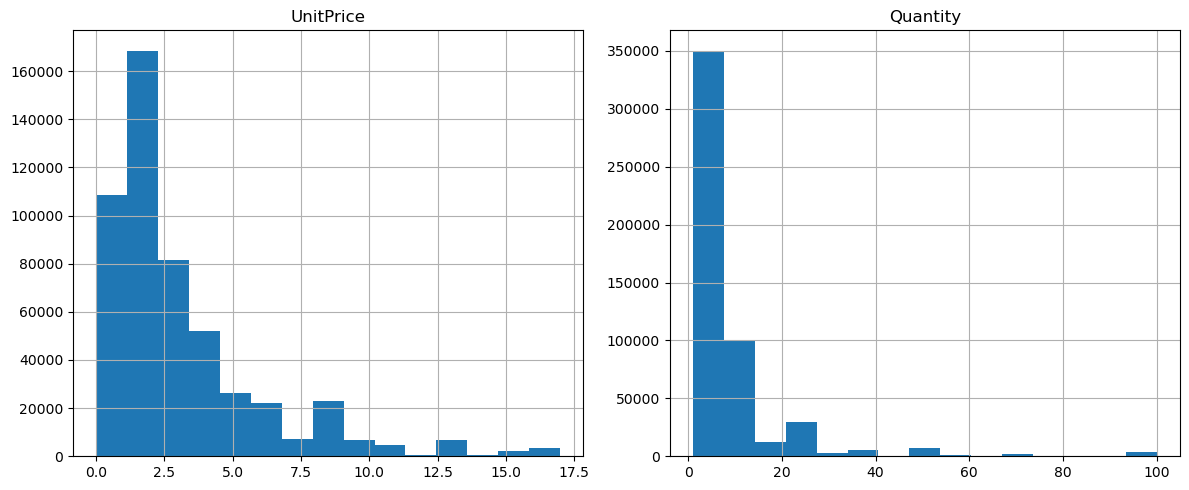

In [112]:
# Plot histograms for 'UnitPrice' and 'Quantity' columns
df_cleaned_products[["UnitPrice", "Quantity"]].hist(bins=15, figsize=(12, 5), layout=(1, 2))
plt.tight_layout()
plt.show()

In [114]:
# Calculate Quantity per Transaction (Average quantity per unique invoice)
quantity_per_transaction = df_cleaned_products.groupby("InvoiceNo")["Quantity"].sum().mean()

# Calculate Total Revenue
df_cleaned_products["TotalRevenue"] = df_cleaned_products["Quantity"] * df_cleaned_products["UnitPrice"]
total_revenue = df_cleaned_products["TotalRevenue"].sum()

# Display results
print(f"Average Quantity per Transaction: {quantity_per_transaction:.2f}")
print(f"Total Revenue: ${total_revenue:,.2f}")

Average Quantity per Transaction: 214.61
Total Revenue: $8,100,424.45


# 4. Exporting the cleaned dataframe

In [122]:
path = r'/Users/buketoztekin/Documents/Tata Internship/cleaned_data.csv'
df_cleaned_products.to_csv(path, index=False)
print(f"File saved successfully at: {path}")

File saved successfully at: /Users/buketoztekin/Documents/Tata Internship/cleaned_data.csv
